<center>
<a href="https://colab.research.google.com/github/OsipovOleg/crash-python-notebooks/blob/master/scientific_computing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

Для краткого знакомства с numpy:
- [A Quick Introduction to the NumPy Library](https://towardsdatascience.com/a-quick-introduction-to-the-numpy-library-6f61b7dee4db)
- [NumPy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [Examples] (https://github.com/OsipovOleg/crash-python-notebooks/blob/master/scientific_computing.ipynb)

# 1. Overfitting/Underfitting

Рассмотрим здесь задачу восстановления зависимости $y = 2\sin(x)$ на отрезке $(0,7)$.

В качестве модели будем использовать полиномы.

In [2]:
N = 10
x = np.linspace(0, 7, N)
x[:10]

array([0.   , 0.778, 1.556, 2.333, 3.111, 3.889, 4.667, 5.444, 6.222,
       7.   ])

In [3]:
y_true = 2*np.sin(x)
y_true[:10]

array([ 0.   ,  1.403,  2.   ,  1.446,  0.061, -1.359, -1.998, -1.488,
       -0.122,  1.314])

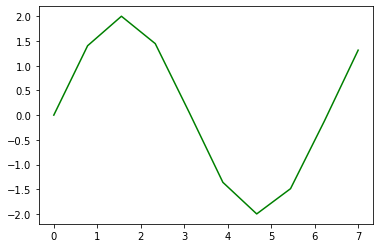

In [4]:
plt.plot(x, y_true, c='green');

In [5]:
y = y_true + np.random.normal(0, 1, len(y_true))
y[:10]

array([-1.214, -0.462,  3.549,  1.84 , -0.638, -1.368, -0.686, -1.359,
        0.729,  1.369])

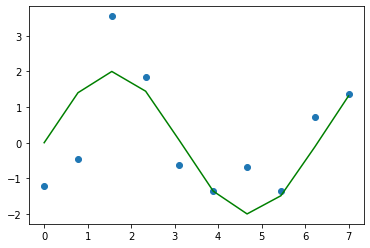

In [6]:
plt.scatter(x, y);
plt.plot(x, y_true, c='green');

## Polinomial Regression

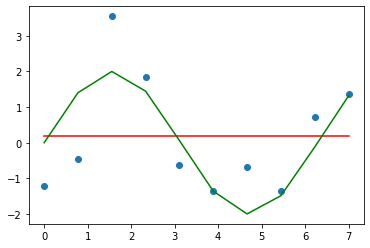

In [7]:
d = 0
model = np.poly1d(np.polyfit(x, y, d))

x_validation = np.linspace(0, 7, N*10)
y_pred = model(x_validation)

plt.scatter(x, y)
plt.plot(x_validation, y_pred,  c='red');
plt.plot(x, y_true, c='green'); 

### Задания: 

1. Разбить выборку на train/test в некотором соотношении. 
2. Вычислить для различных значений $d$ (степень полинома) MSE на train/test. Построить кривые MSE для train/test при различных значениях $d$. 
3. Как изменяется качество модели, если в нее добавить больше данных (увеличить $N$)? Привести несколько примеров. 
4. Какие выводы можно сделать из пунктов 2 и 3. Как влияет сложность модели и количество данных на переобучение (overfitting)? 

Еще одной метрикой качества, которую можно использовать в задаче регрессии, является коэффициент детерминации (coefficient of determination), который показывет долю объясненной дисперсии: 

$$
    R^2 = 1 - \frac{\sum_{i=1}^{N}(\hat{y}_i-y_i)^2}{\sum_{i=1}^{N} (y_i - \bar{y})^2}
$$

$\bar{y}$ - выборочное среднее (самый простой baseline, который можно взять для нашей задачи - самая простая модель, которую затем можно использовать для сравнения с более сложными моделями).

5. Определить $R^2$ для различных $d$. Сделать выводы. 
6. Ранее было указано, что одним из простых baseline для нашей задачи, *может быть* выборочнее среднее. 
Расмотрим модель, которая для всех объектов возвращает константное значение (полином нулевой степени): 

$$
\hat{y} (\textbf{x}) = w_0
$$

аналитически определить параметры модели ($w_0$), минимизирующие MSE. 

7. Определить аналогично baseline для MAE. 

# 2. Linear models
## 1. Regression

Объекты: $\textbf{x}_1, \textbf{x}_2, \dots, \textbf{x}_N$

Признаки некоторого объекта: $\textbf{x}=(x_1, \dots, x_D)$

$\mathcal{D} = (\textbf{x}_i, y_i)$, $i=1, \dots, N$ - множество объектов и ответов на них,

$\textbf{X}$ - матрица  объекты-признаки (каждая строка описывает один объект):



$$\textbf{X} = 
\begin{bmatrix}
x_{1,1} & x_{1,2} & \dots & x_{1,D}\\
x_{2,1} & x_{2,2} & \dots & x_{2,D}\\
\dots & \dots & \dots & \dots\\
x_{N,1} & x_{N,2} & \dots & x_{N,D}
\end{bmatrix}
$$


Уравнение регрессии:

$$
\hat{y} (\textbf{x}) = w_0 + w_1x_1 + \dots + w_D x_D
$$

здесь $\hat{y} (\textbf{x})$ -  предсказание на объекте $\textbf{x}$. 

MSE может быть записано в матричной форме:
$$
\frac{1}{N}||\textbf{X}\textbf{w} - \textbf{y}||^{2} \to \min_{\textbf{w}}
$$

Точное решение задачи оптимизации (нормальное уравнение линейной регрессии):

$$
\textbf{w}^* = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^{T} \textbf{y} 
$$

### Задания:
1. Для одномерного случая ($D=1$, $\hat{y} = w_0 + w_1x$) найти вид выражений для $\textbf{w}^* = (w_0^*, w_1^*)$, минимизирующее MSE. 


Далее рассмотрим следующую модельную задачу и данные, на которых нужно будет выполнять задания.  

In [8]:
N = 50
D = 4
# матрица объекты-признаки
X = np.random.uniform(0, 1, (N, D))
X[:10]

array([[0.295, 0.685, 0.575, 0.755],
       [0.741, 0.291, 0.894, 0.294],
       [0.607, 0.108, 0.704, 0.766],
       [0.152, 0.381, 0.732, 0.678],
       [0.619, 0.425, 0.874, 0.031],
       [0.252, 0.508, 0.121, 0.318],
       [0.9  , 0.655, 0.395, 0.636],
       [0.075, 0.859, 0.335, 0.048],
       [0.386, 0.395, 0.084, 0.614],
       [0.366, 0.87 , 0.18 , 0.429]])

In [9]:
#  Добавим единичный признак (для w_0)
D += 1
x_ones = np.ones((N, 1))
X = np.hstack((x_ones, X))
X[:10]

array([[1.   , 0.295, 0.685, 0.575, 0.755],
       [1.   , 0.741, 0.291, 0.894, 0.294],
       [1.   , 0.607, 0.108, 0.704, 0.766],
       [1.   , 0.152, 0.381, 0.732, 0.678],
       [1.   , 0.619, 0.425, 0.874, 0.031],
       [1.   , 0.252, 0.508, 0.121, 0.318],
       [1.   , 0.9  , 0.655, 0.395, 0.636],
       [1.   , 0.075, 0.859, 0.335, 0.048],
       [1.   , 0.386, 0.395, 0.084, 0.614],
       [1.   , 0.366, 0.87 , 0.18 , 0.429]])

In [10]:
# Вектор весов
w_true = np.random.uniform(low=-5, high=10, size=(D, 1))
w_true

array([[ 1.267],
       [ 6.946],
       [ 9.367],
       [-2.598],
       [ 7.764]])

In [11]:
# Целевая переменная (target)
# y = w0 + w1*x_1 + ... + wD*xD
y = X@w_true
y[:10]

array([[14.099],
       [ 9.096],
       [10.614],
       [ 9.258],
       [ 7.516],
       [ 9.921],
       [17.565],
       [ 9.34 ],
       [12.196],
       [14.824]])

Получили следующие вектора и матрицы:  X, y, w_true. 

### Задания:
2. Используя нормальное уравнение линейной регресси, найти значение $\textbf{w}^*$. 

## 2.1 Gradient descent

$$
    \textbf{w}^{(k)} = \textbf{w}^{(k-1)} - \alpha_k \nabla Q\left(\textbf{w}^{(k-1)}\right)
$$

### Задания: 

3. Реализовать метод градиентного спуска для одной из указанных функций [Wiki: Тестовые функции для оптимизации](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)

4.  Определить вид градиента в случае MSE. Применить метод градиентного спуска для поиска весов линейной регрессии для представленных выше данных.
Построить график зависимости эмпирического риска $Q(\textbf{w}^{(k)})$ от шага $k$.
Сравнить с точным решением. 

# 2.2 Stochastic gradient descent  (SGD)

$$
\nabla Q(\textbf{w}) \approx \frac{1}{n}\sum_{k=1}^{n} \nabla l_{i_k}(\textbf{w})
$$

5.  Применить метод стохастического градиентного спуска для поиска весов линейной регрессии (при разных размерах батча) для представленных выше данных.
Построить график зависимости эмпирического риска $Q(w(k))$ от шага $k$. Сравнить скорость сходимости с методом градиентного спуска. 
Сравнить с точным решением. 